In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [0]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (100,100,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




In [0]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'sigmoid', units=2)) 
 


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)             

In [0]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [73]:
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/helmet_detection/training',
        target_size=(100, 100),
        class_mode='categorical')

Found 647 images belonging to 2 classes.


In [74]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/helmet_detection/testing',
        target_size=(100, 100),
        class_mode='categorical')

Found 208 images belonging to 2 classes.


In [87]:
model.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set)


Epoch 1/5
21/21 [==============================] - 19s 889ms/step - loss: 0.4653 - acc: 0.7885 - val_loss: 0.3289 - val_acc: 0.8750
Epoch 2/5
21/21 [==============================] - 18s 864ms/step - loss: 0.4074 - acc: 0.8272 - val_loss: 0.3492 - val_acc: 0.8534
Epoch 3/5
21/21 [==============================] - 18s 863ms/step - loss: 0.3364 - acc: 0.8554 - val_loss: 0.3339 - val_acc: 0.8582
Epoch 4/5
21/21 [==============================] - 18s 861ms/step - loss: 0.3184 - acc: 0.8547 - val_loss: 0.4556 - val_acc: 0.7933
Epoch 5/5
21/21 [==============================] - 19s 881ms/step - loss: 0.2827 - acc: 0.8772 - val_loss: 0.7019 - val_acc: 0.7260


In [65]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [66]:
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [0]:
import cv2
import numpy as np



In [0]:
#Prediction

In [0]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/helmet_detection/inference/abf.jpg'
                           ,target_size =(100,100))


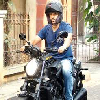

In [122]:
test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [124]:
test_image.shape

(100, 100, 3)

In [0]:
test_image=test_image.reshape(1,100, 100, 3)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [127]:
np.around(result)

array([[1., 0.]], dtype=float32)

In [0]:
result=result.argmax()

In [129]:
result

0

In [0]:
## Class label of dog and cat

if result == 0:
    prediction = 'with helmet'
else:
    prediction = 'without helmet'
    

In [131]:
prediction

'with helmet'